<a href="https://www.kaggle.com/code/mh0386/car-price-prediction?scriptVersionId=127351369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Presentation](https://tome.app/mh0386/revving-up-the-future-ai-powered-used-car-price-predictions-clgtjqlbx17hp1u41lb7yr442)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures

# Data

## Read Data

In [2]:
try:
    data = pd.read_csv('/kaggle/input/cars-dataset-audi-bmw-ford-hyundai-skoda-vw/cars_dataset.csv')
except FileNotFoundError:
    data = pd.read_csv('cars_dataset.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


## Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


## Describe

In [4]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


## Nulls

In [5]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

## Data Columns

In [6]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

# Draw

## Histograms

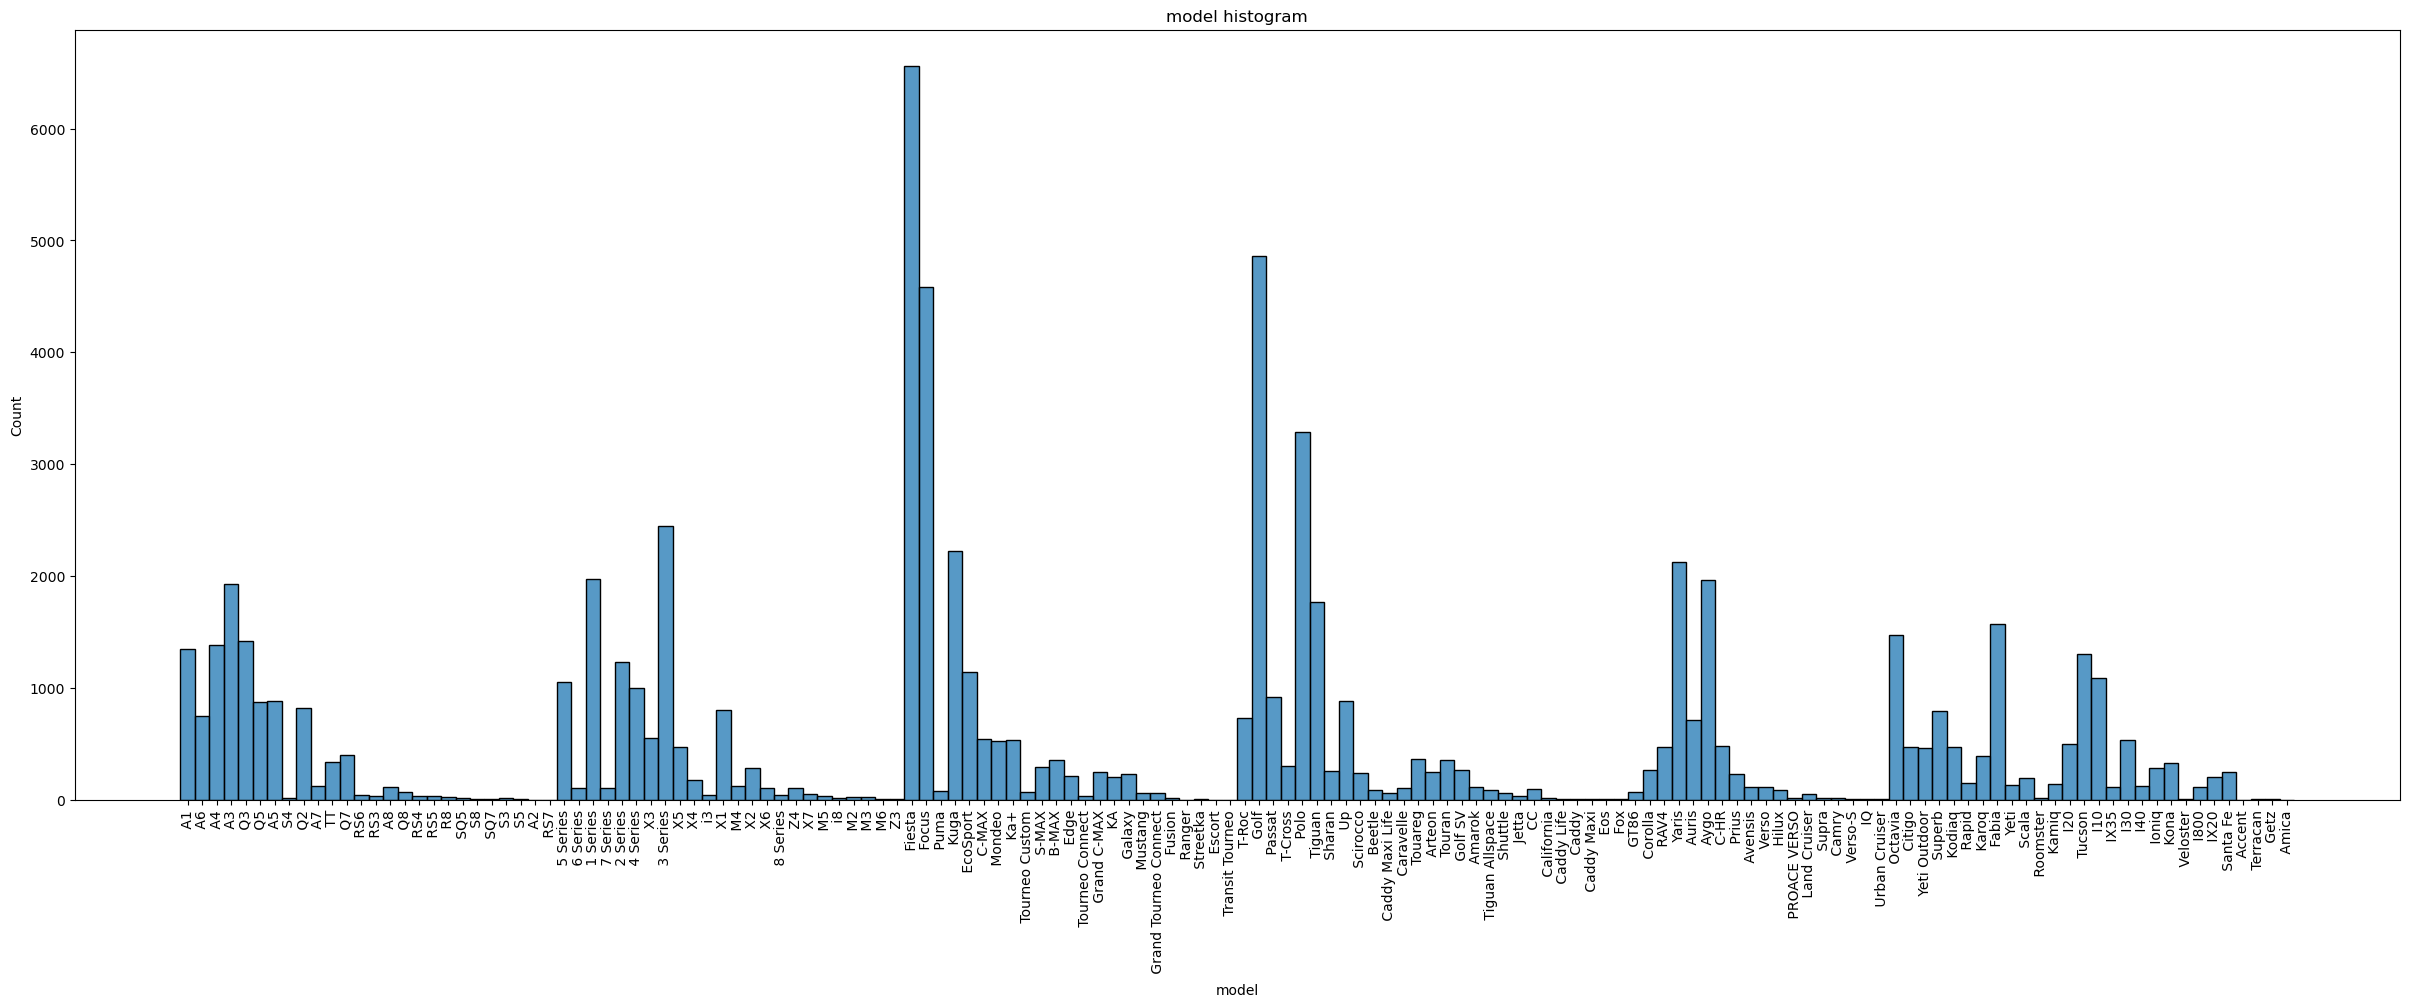

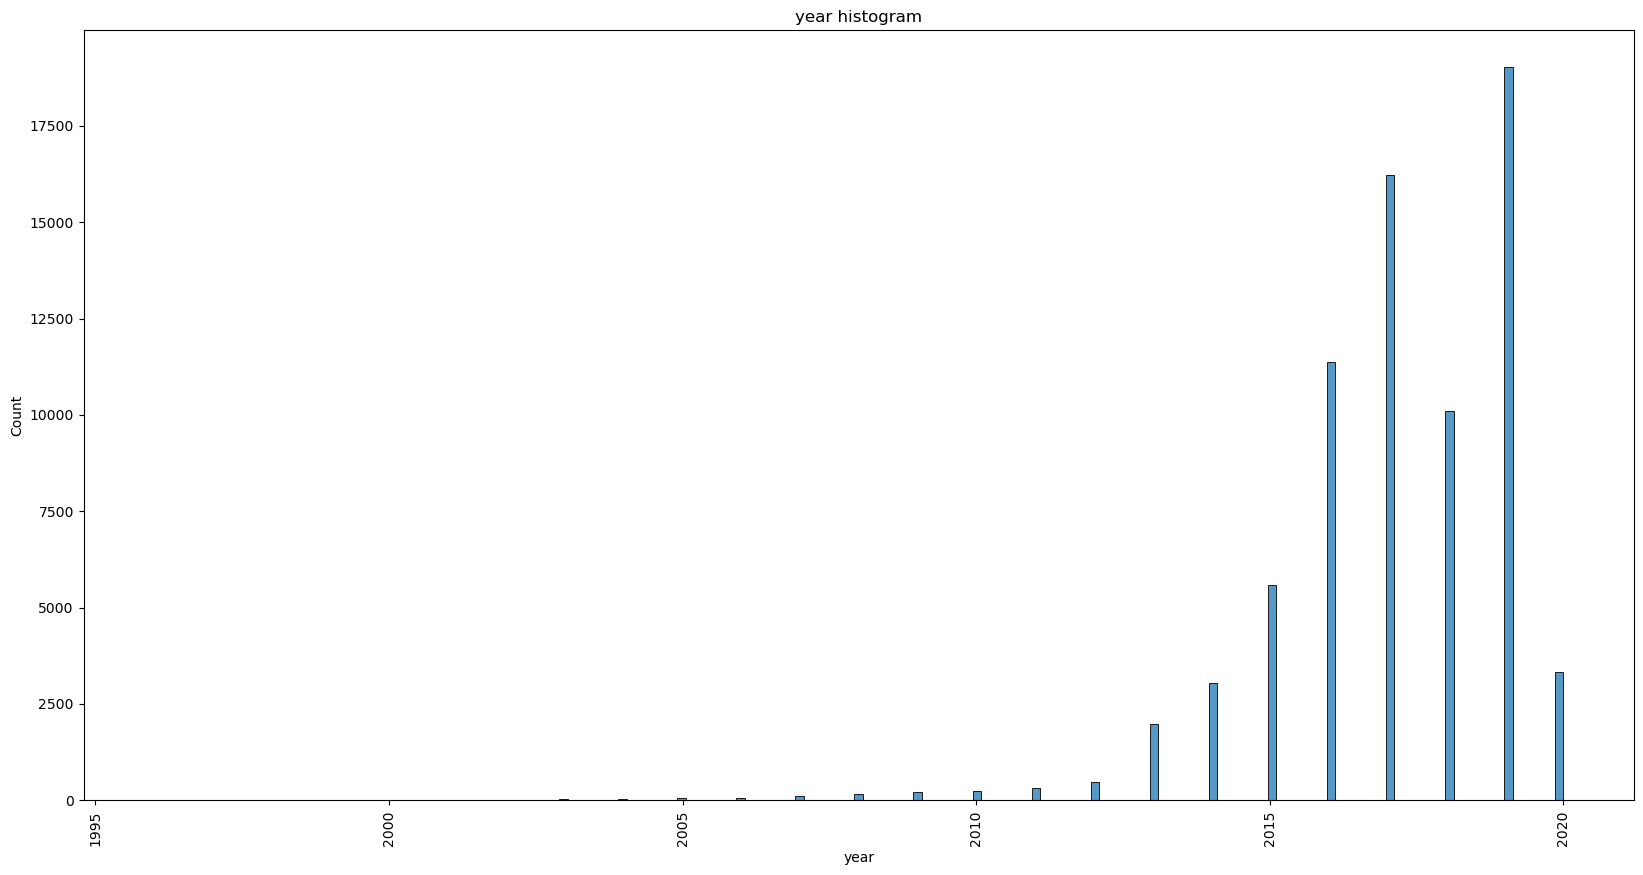

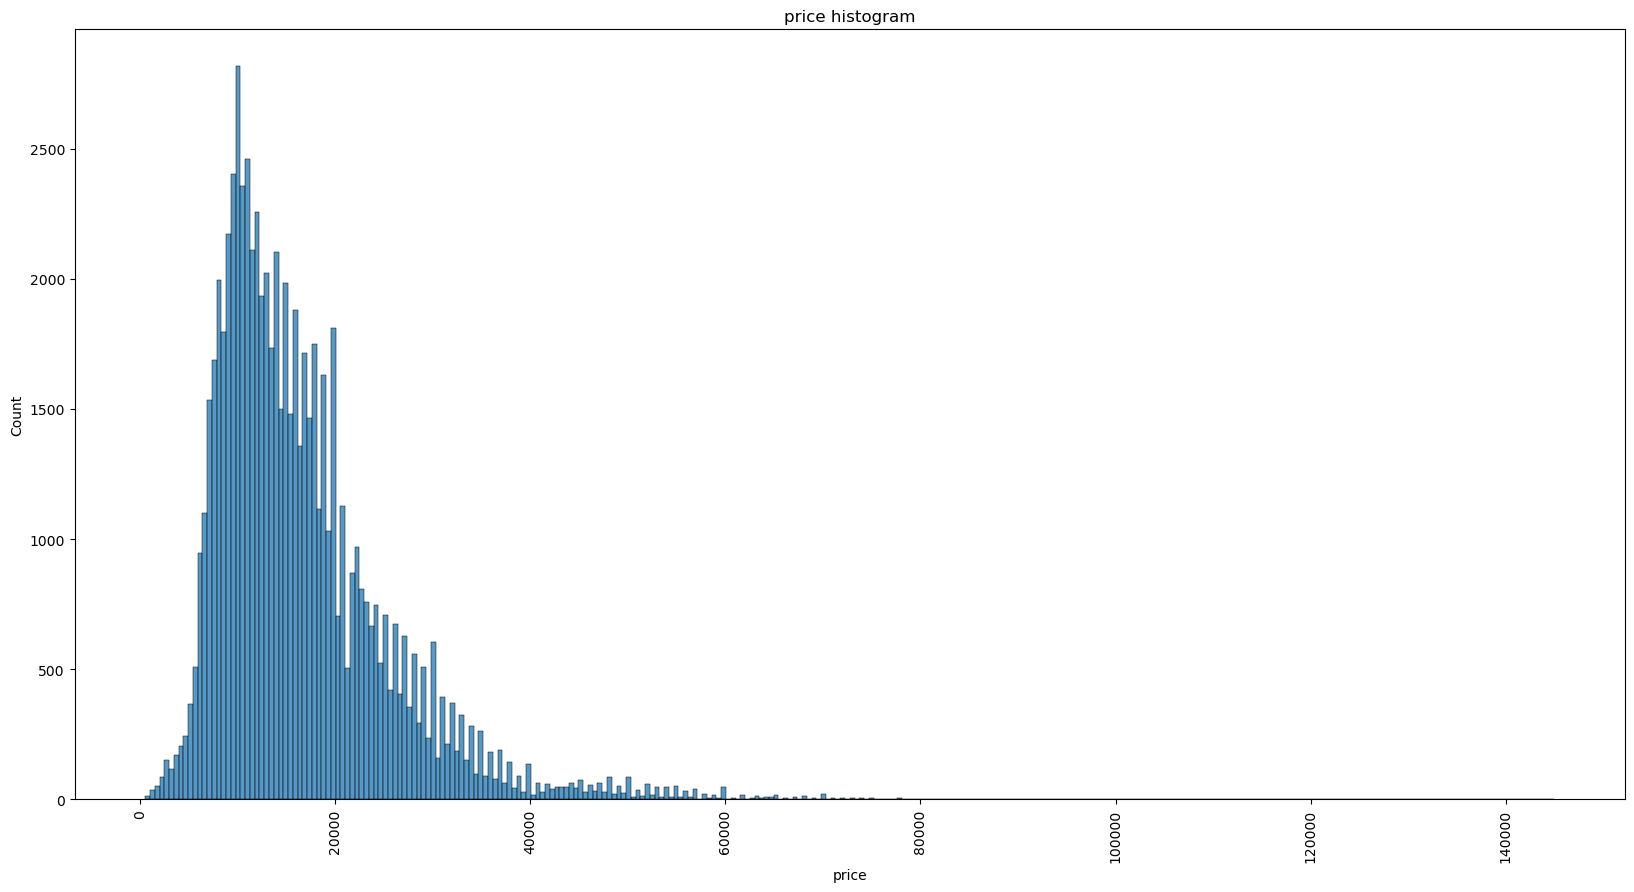

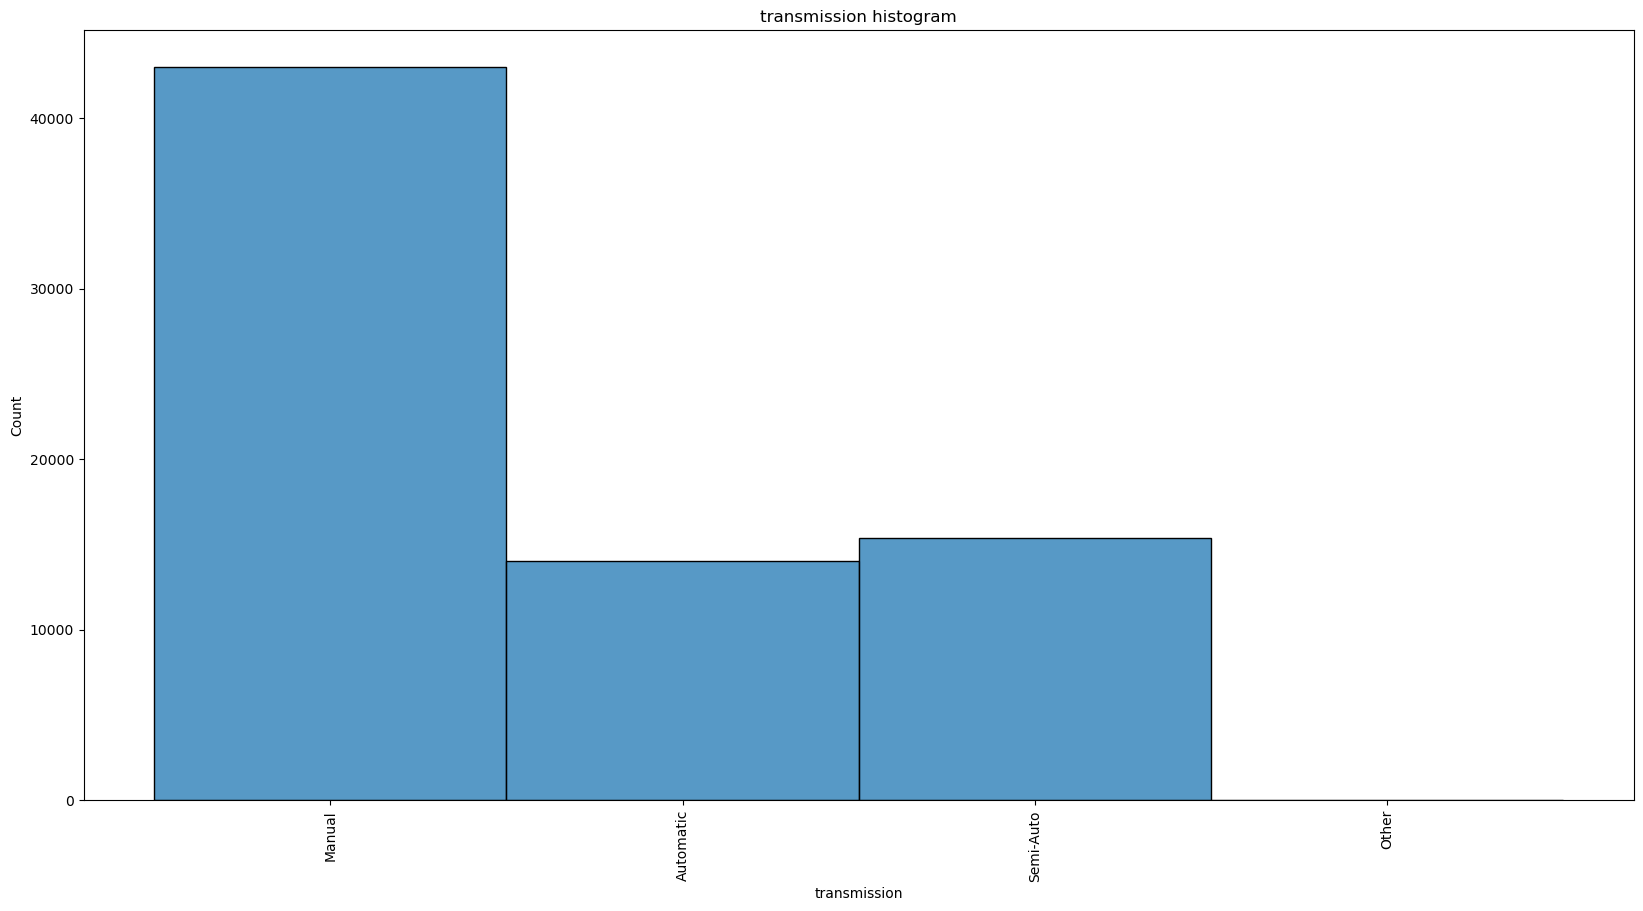

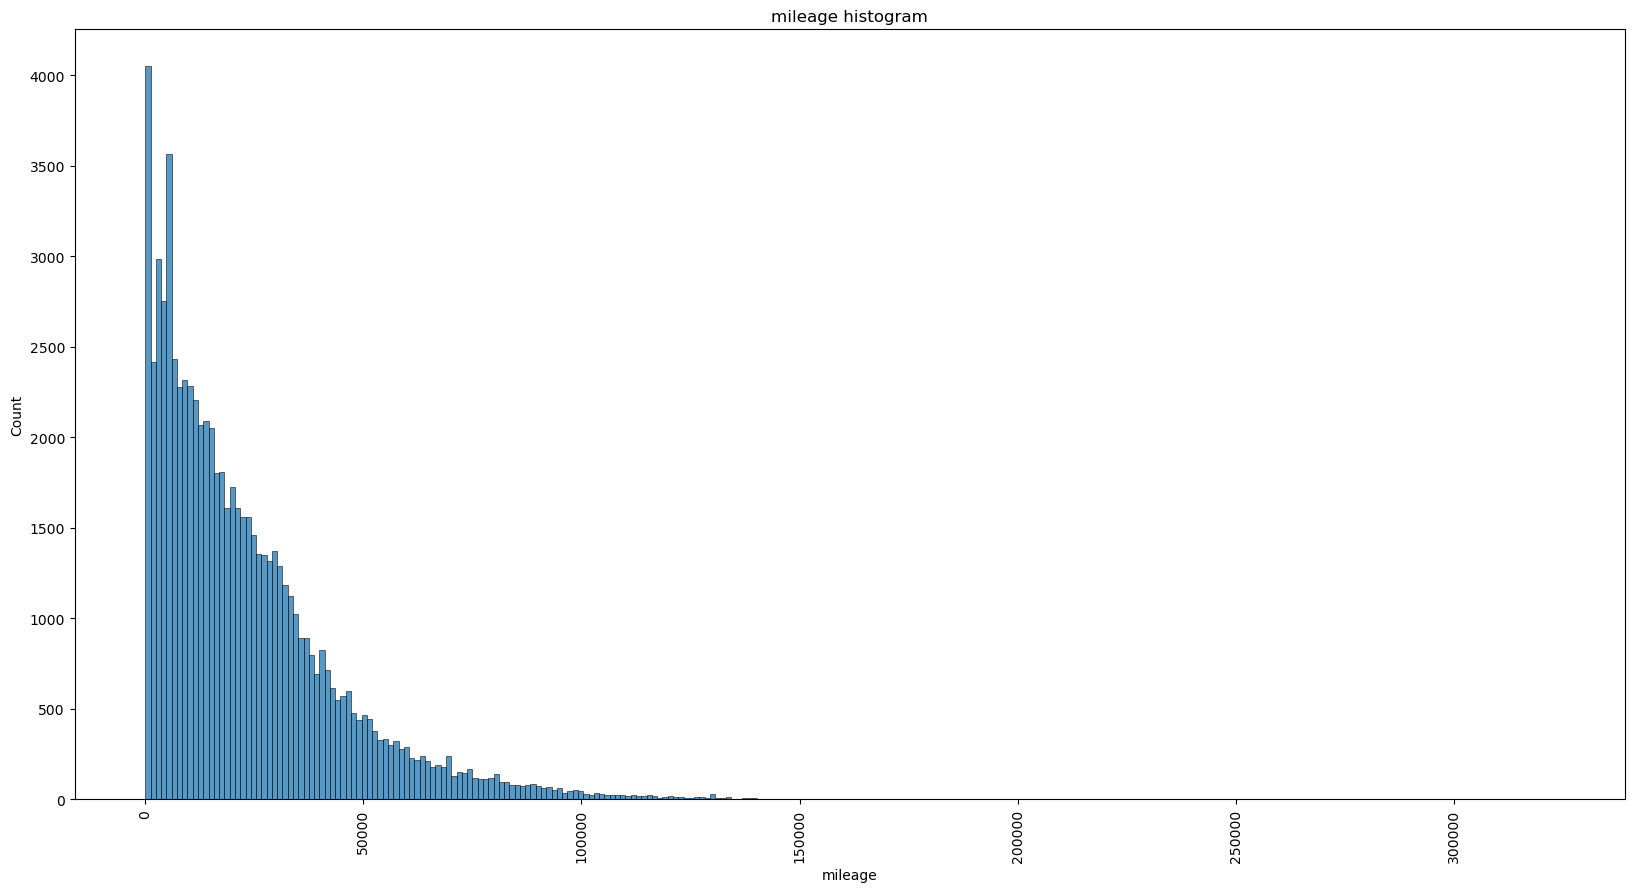

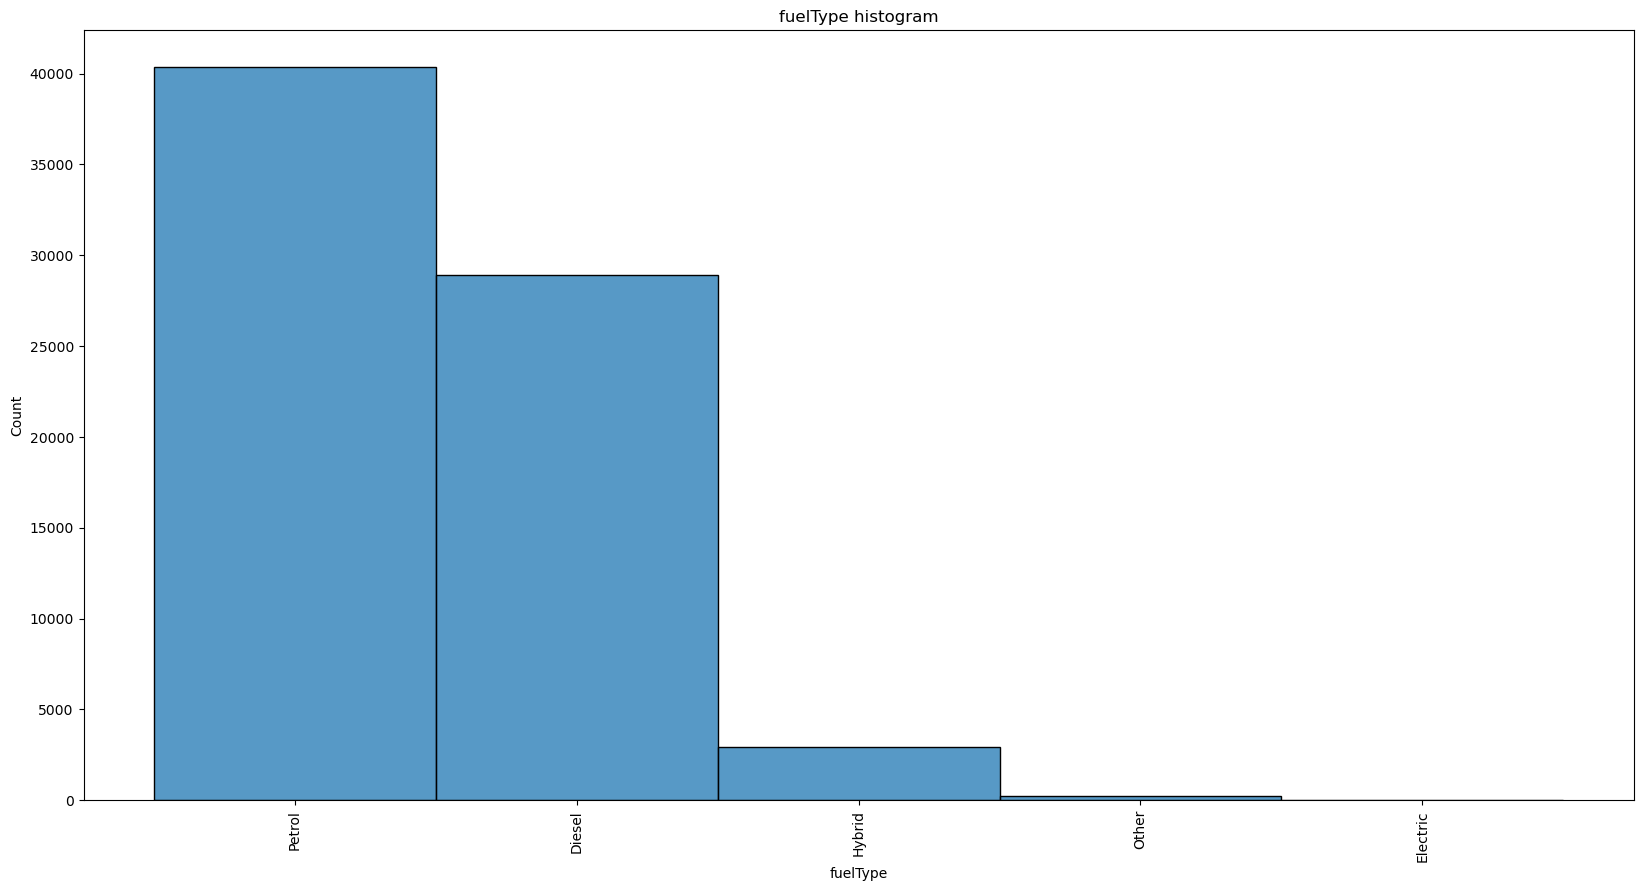

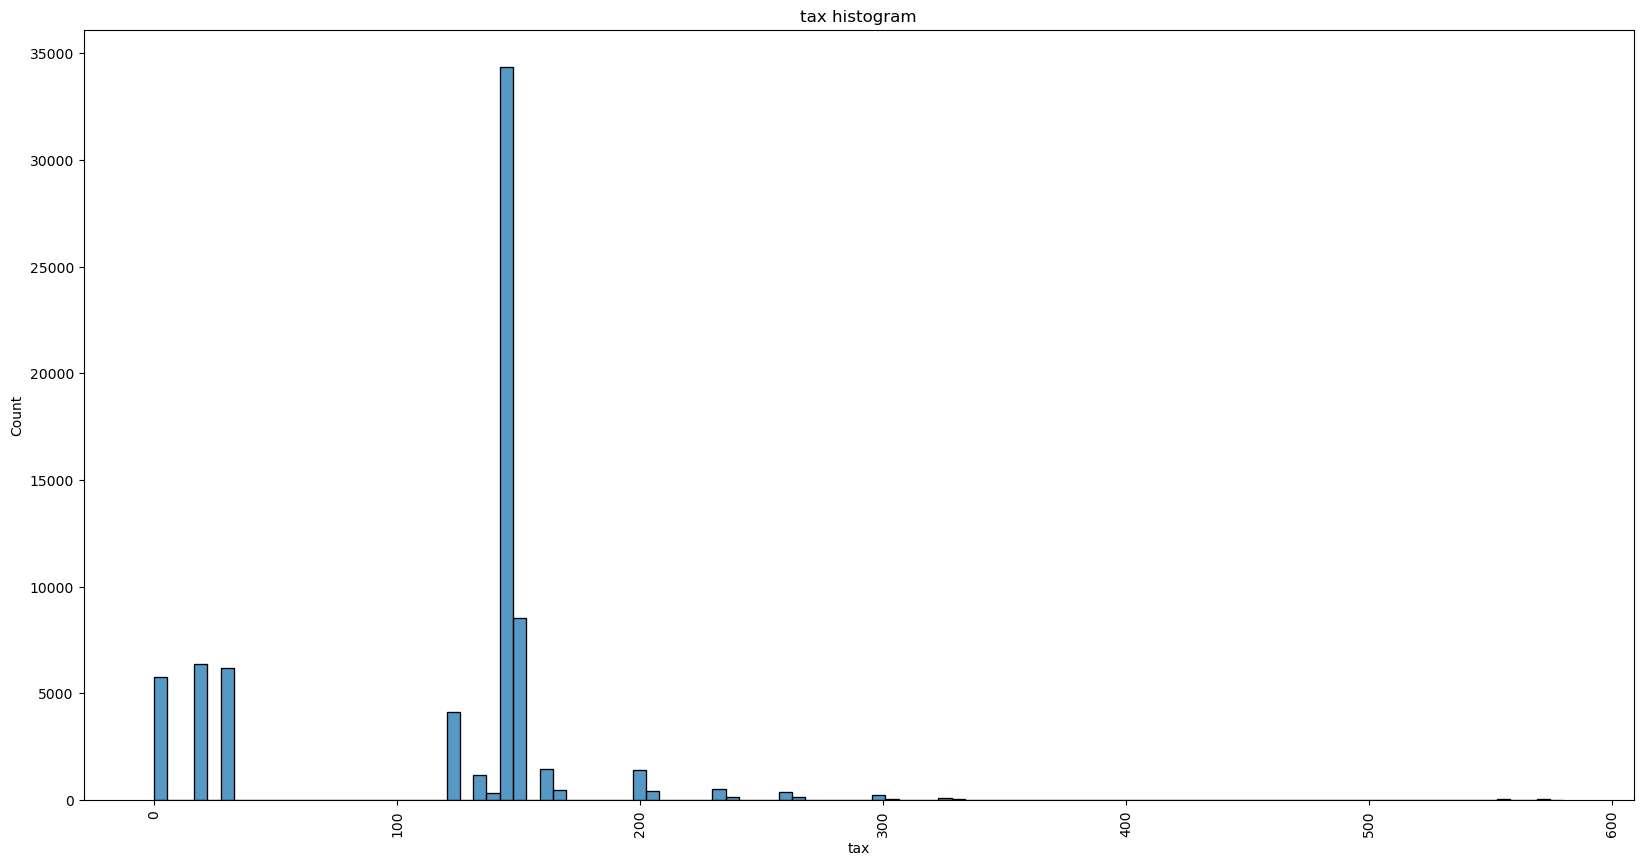

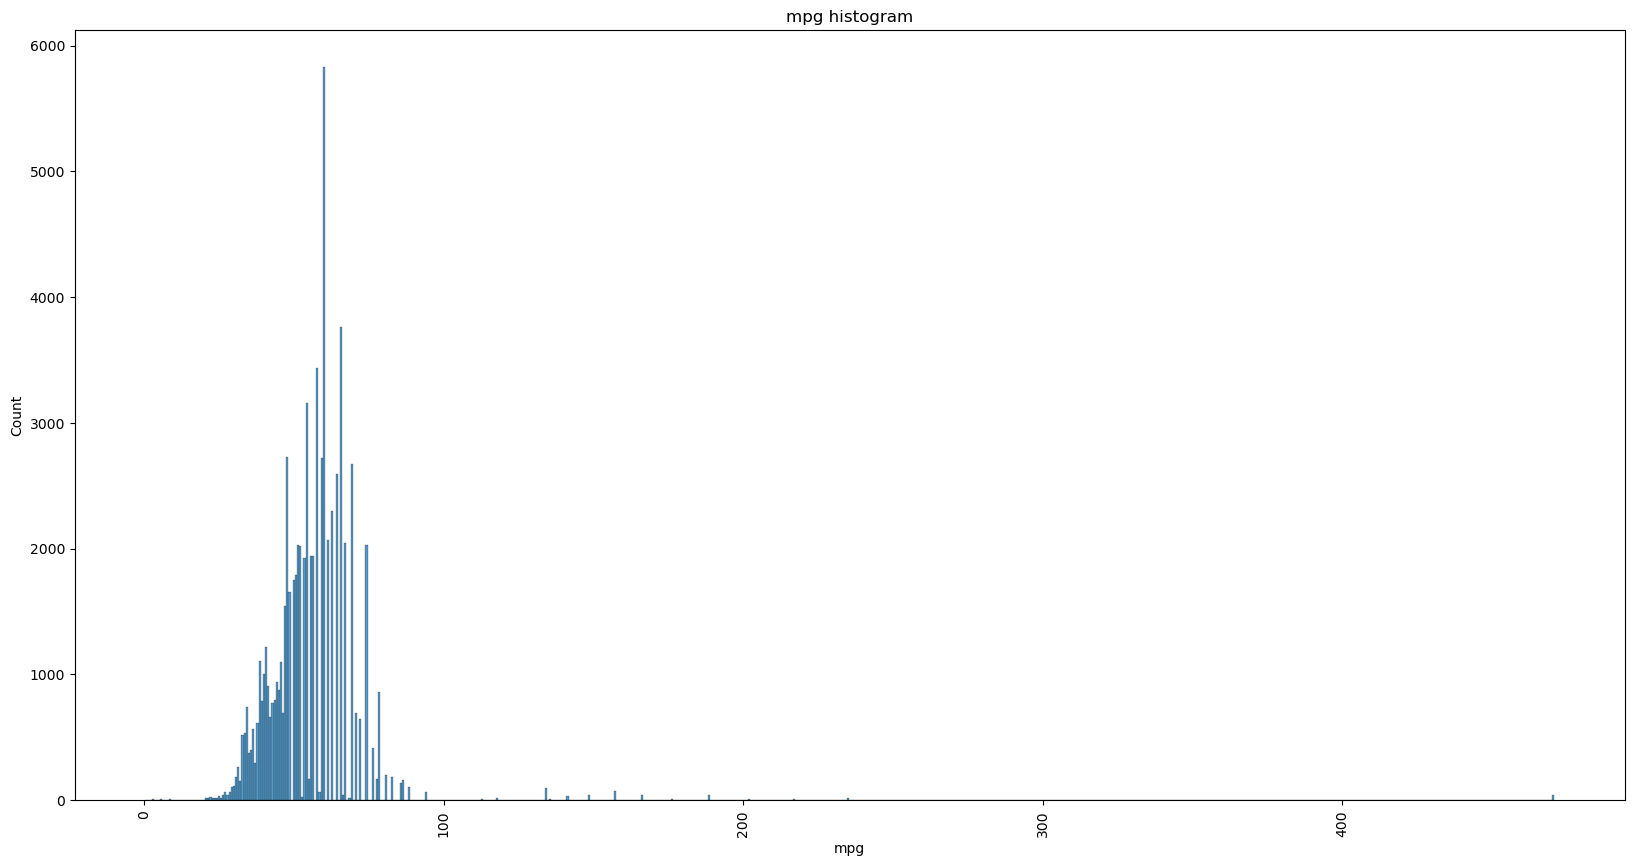

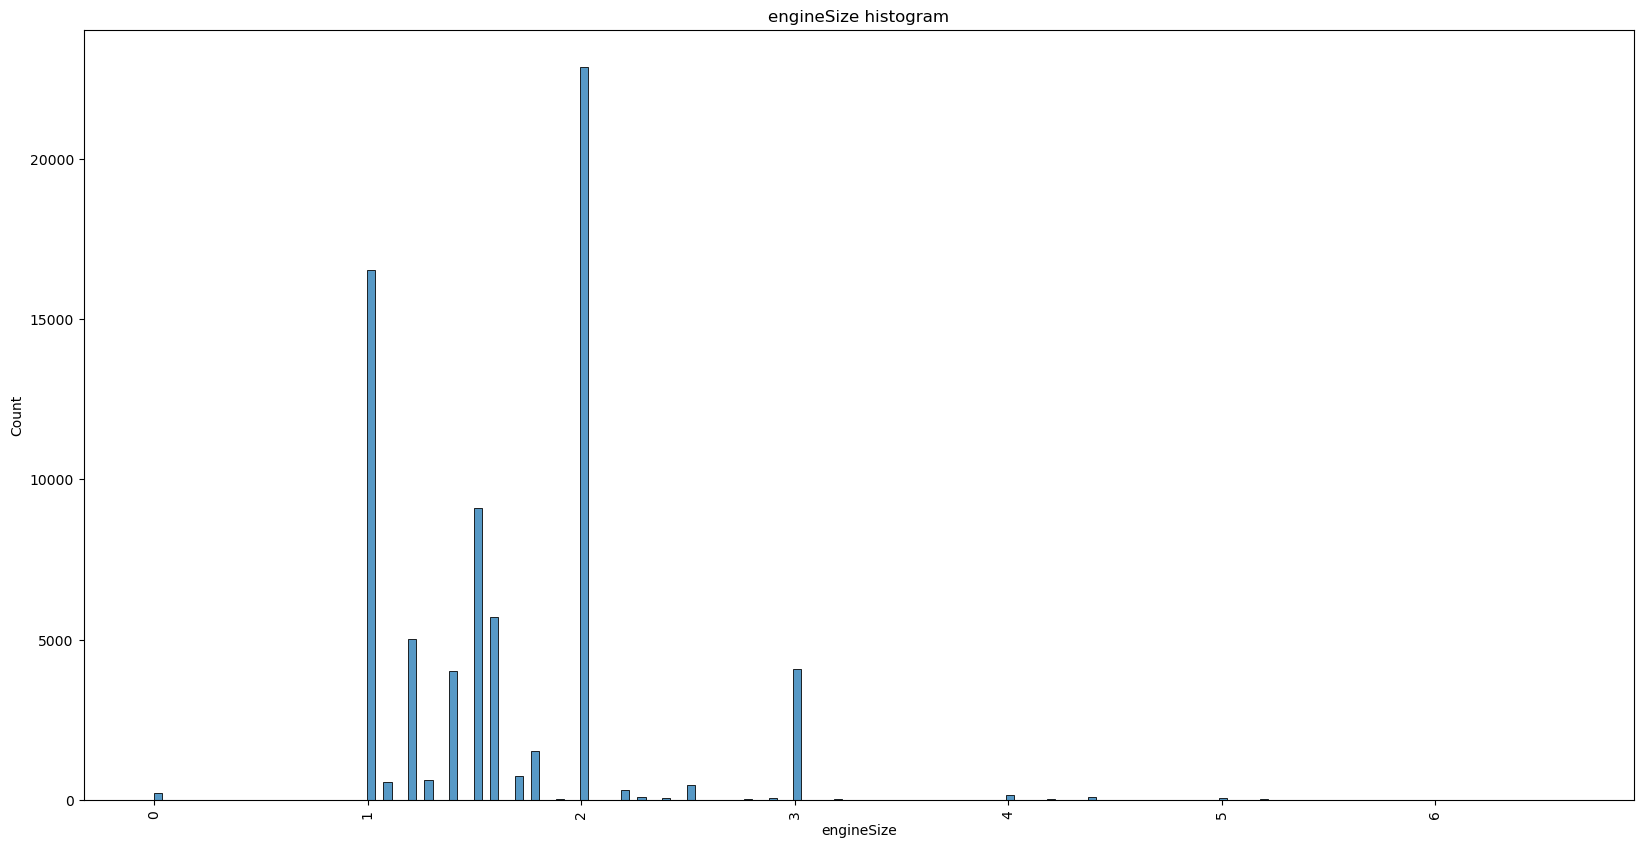

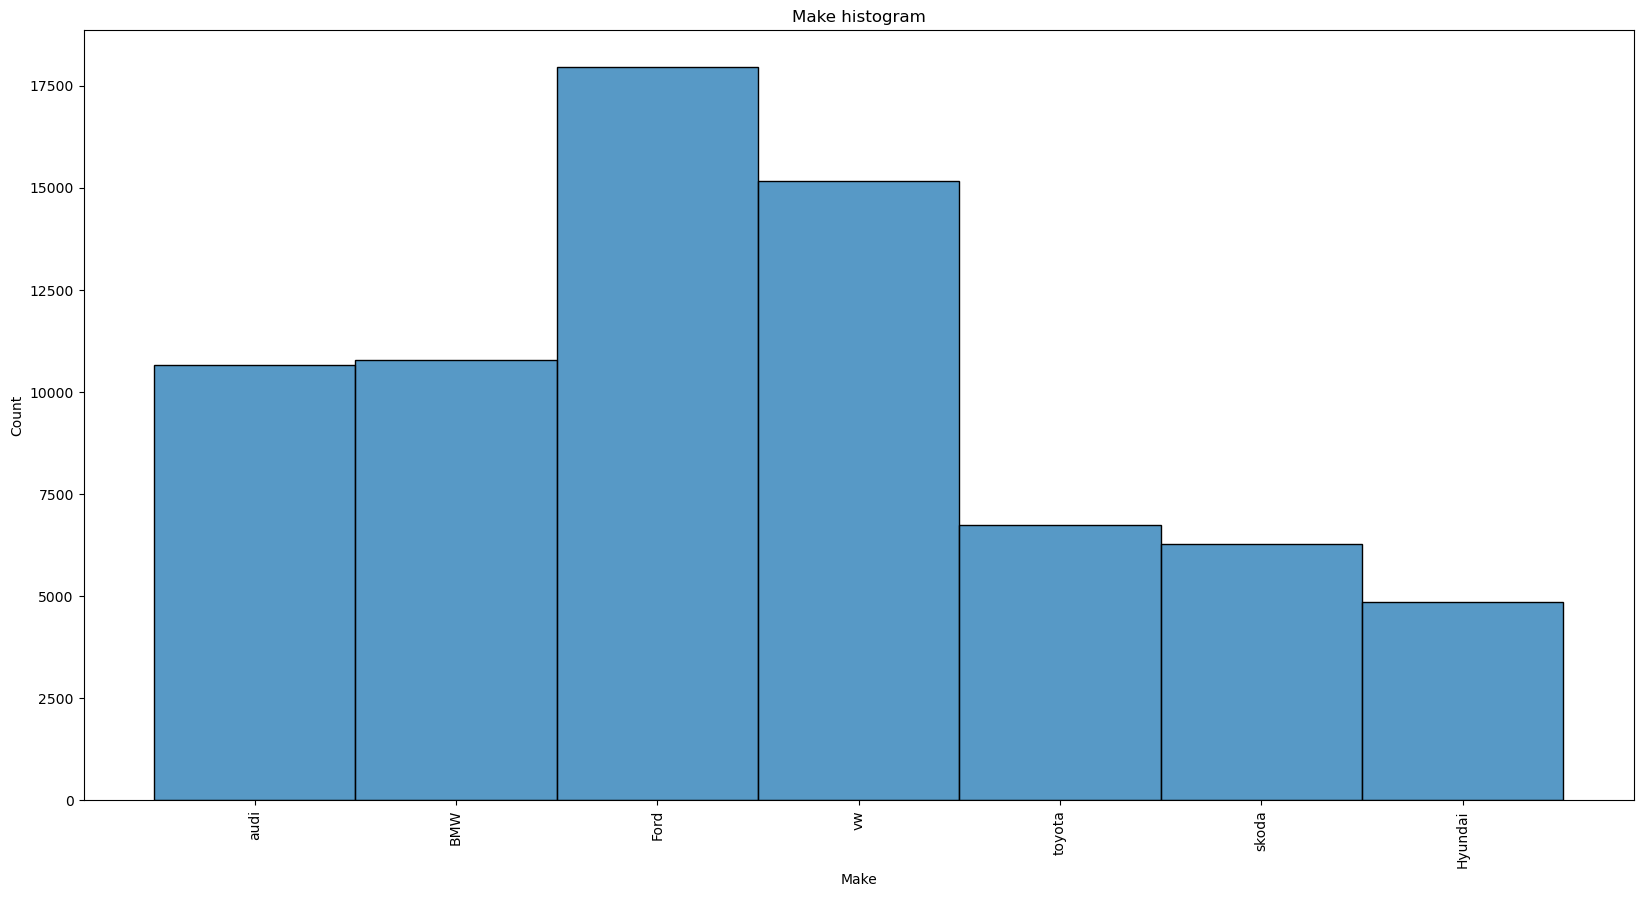

In [7]:
for col in data.columns:
    if col == 'model':
        fig, ax = plt.subplots(figsize=(30, 10))
    else:
        fig, ax = plt.subplots(figsize=(20, 10))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=data, x=col, ax=ax)
    plt.show()

## Heatmap

<AxesSubplot:>

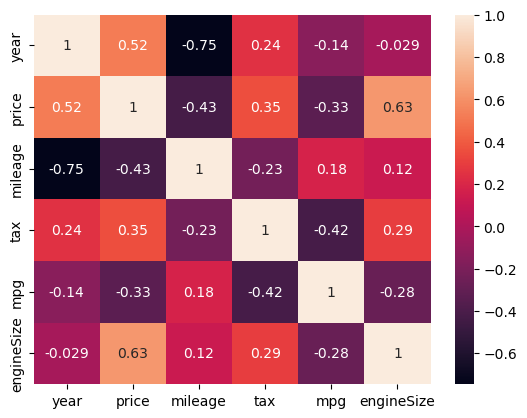

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [10]:
data.model = preprocessing.LabelEncoder().fit_transform(data.model)
data.transmission = preprocessing.LabelEncoder().fit_transform(data.transmission)
data.fuelType = preprocessing.LabelEncoder().fit_transform(data.fuelType)
data.Make = preprocessing.LabelEncoder().fit_transform(data.Make)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [11]:
data.mileage = standardize(data.mileage)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,-0.348853,4,150.0,55.4,1.4,3
1,13,2016,16500,0,0.610673,0,20.0,64.2,2.0,3
2,8,2016,11000,1,0.317349,4,30.0,55.4,1.4,3
3,11,2017,16800,0,0.130113,0,145.0,67.3,2.0,3
4,10,2019,17300,1,-0.992834,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,0.127956,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,1.703195,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,-0.439096,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,0.006398,4,145.0,44.8,1.6,2


In [12]:
data.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,72435.000000,72435.000000,72435.000000,72435.000000,7.243500e+04,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,58.453855,2017.073666,16580.158708,1.230358,1.726452e-17,2.319431,116.953407,55.852480,1.635650,2.890702
std,41.229274,2.101252,9299.028754,0.994658,1.000007e+00,1.930699,64.045533,17.114391,0.561535,2.174535
min,0.000000,1996.000000,495.000000,0.000000,-1.086452e+00,0.000000,0.000000,0.300000,0.000000,0.000000
25%,25.000000,2016.000000,10175.000000,1.000000,-7.488510e-01,0.000000,30.000000,47.900000,1.200000,1.000000
50%,49.000000,2017.000000,14495.000000,1.000000,-2.646580e-01,4.000000,145.000000,55.400000,1.600000,3.000000
75%,85.000000,2019.000000,20361.000000,1.000000,4.346877e-01,4.000000,145.000000,62.800000,2.000000,5.000000
max,145.000000,2020.000000,145000.000000,3.000000,1.405552e+01,4.000000,580.000000,470.800000,6.600000,6.000000


# Split Data into X and y

In [13]:
data = shuffle(data)
y = data.price
data.drop('price', axis=1, inplace=True)
X = data

## Features

In [14]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
56932,139,2019,1,-0.746906,4,145.0,47.9,1.5,5
7268,87,2015,0,0.758342,0,235.0,42.8,3.0,3
46726,82,2015,1,1.686975,4,20.0,60.1,1.0,6
24533,70,2016,0,-0.468677,4,240.0,38.2,1.5,1
15703,134,2019,3,-0.831757,0,145.0,54.3,2.0,0
...,...,...,...,...,...,...,...,...,...
30450,43,2019,1,-0.879433,4,145.0,60.1,1.0,1
32782,26,2017,1,-0.134709,0,20.0,68.9,1.5,1
28124,70,2017,1,-0.207840,0,125.0,60.1,2.0,1
37441,42,2014,1,0.258656,4,30.0,54.3,1.2,1


## Labels

In [15]:
y

56932    11440
7268     24879
46726     7250
24533    15371
15703    33990
         ...  
30450    18500
32782    10899
28124    14900
37441     6614
42083    26215
Name: price, Length: 72435, dtype: int64

# Linear Regression Models

Degree 1
R2 Score: 0.72
Mean Squared Error: 25050563.32
Mean Absolute Error: 3269.2
Mean Absolute Percentage Error: 0.24


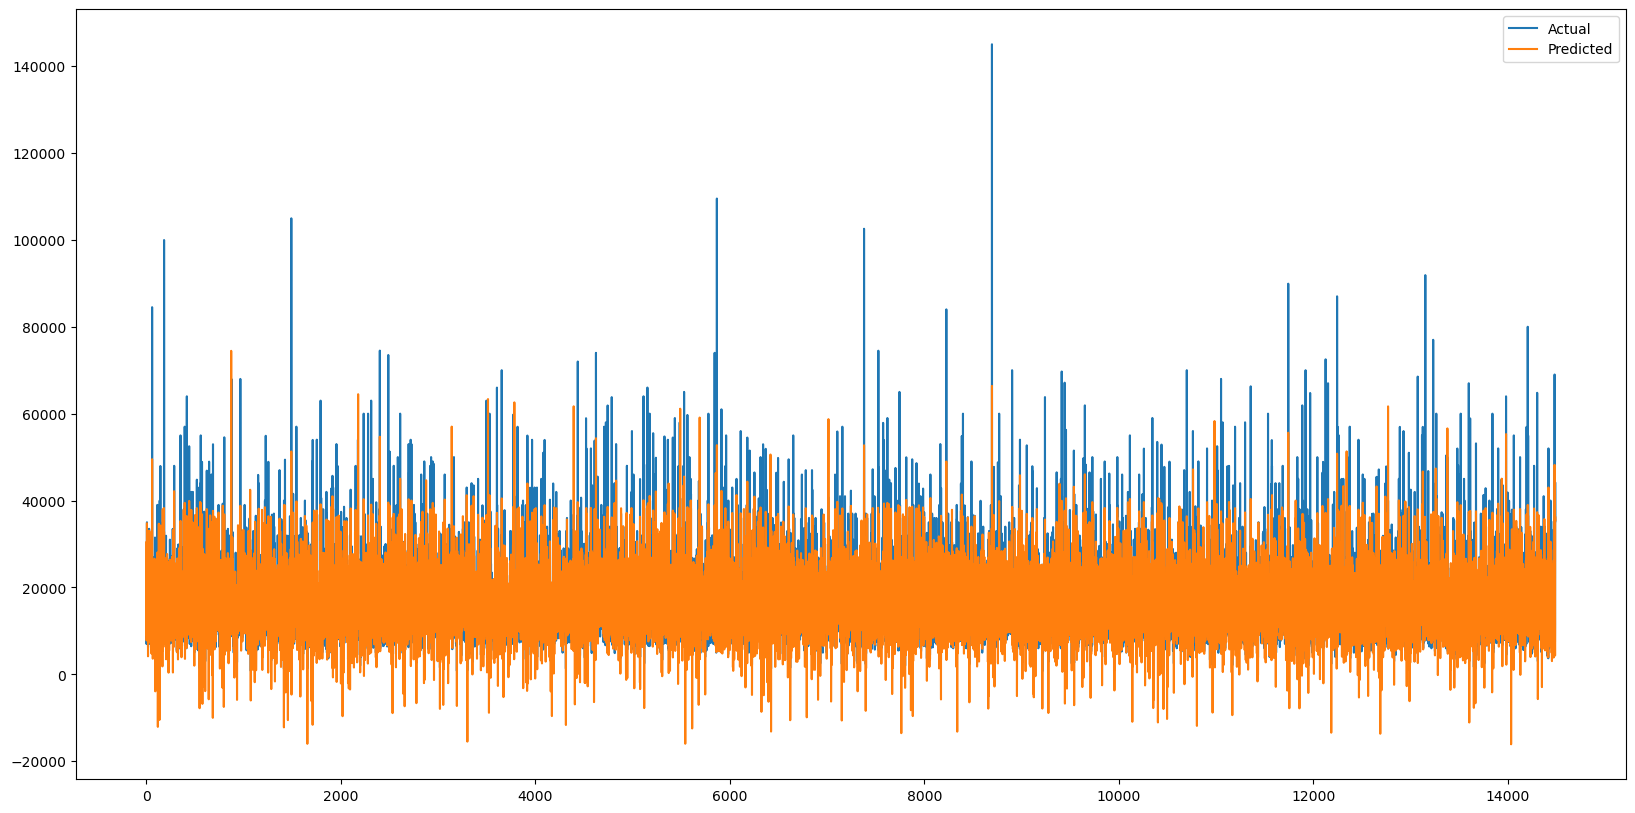



Degree 2
R2 Score: 0.82
Mean Squared Error: 16217054.03
Mean Absolute Error: 2573.48
Mean Absolute Percentage Error: 0.17


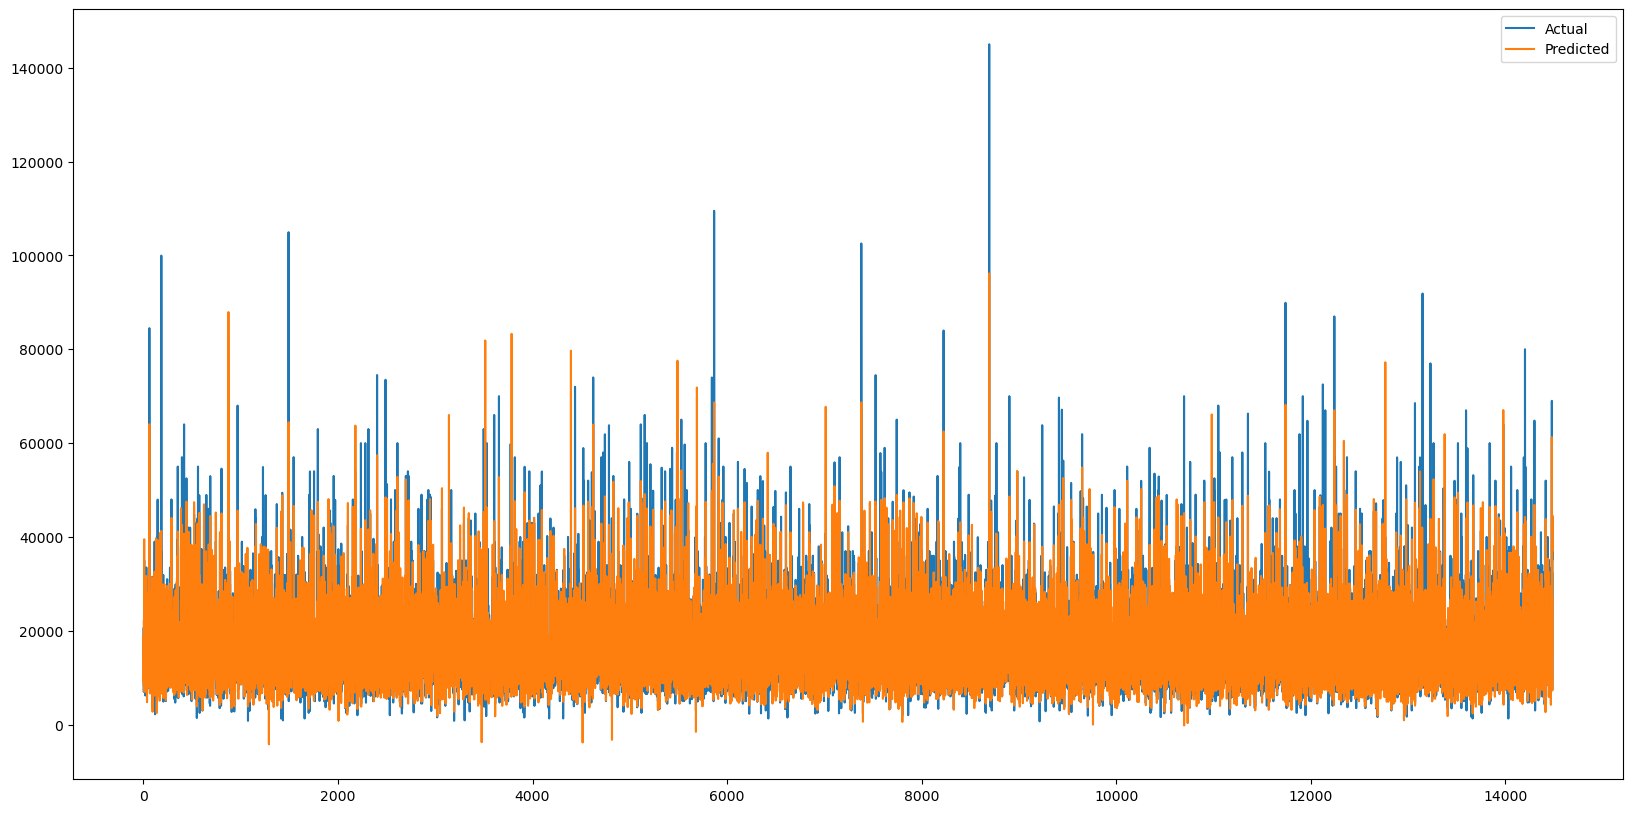



Degree 3
R2 Score: 0.87
Mean Squared Error: 11392887.54
Mean Absolute Error: 2154.11
Mean Absolute Percentage Error: 0.14


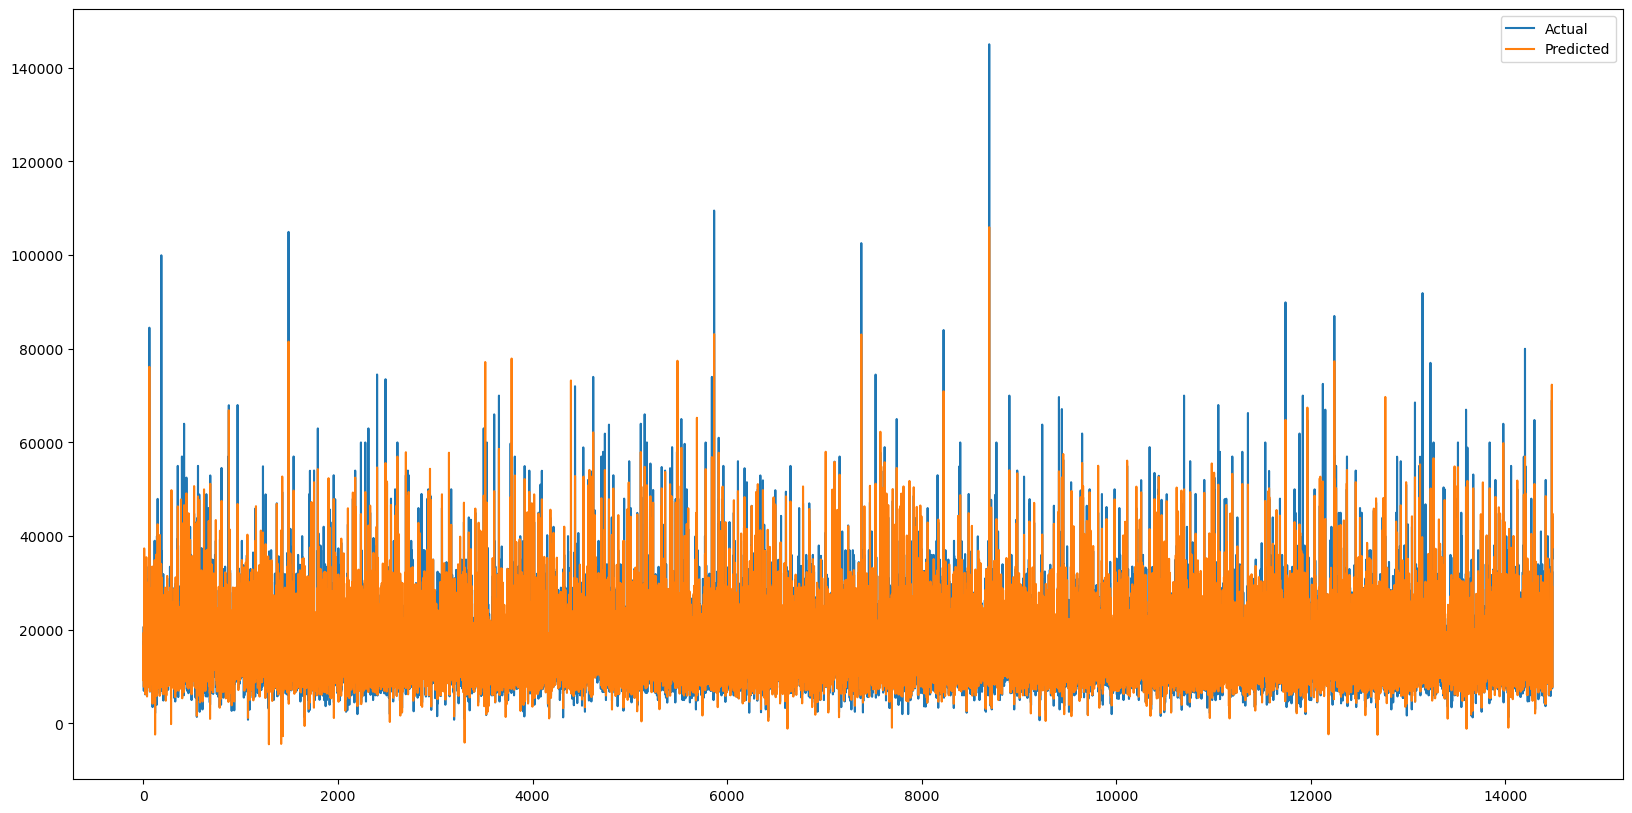



Degree 4
R2 Score: 0.91
Mean Squared Error: 8283158.96
Mean Absolute Error: 1869.33
Mean Absolute Percentage Error: 0.13


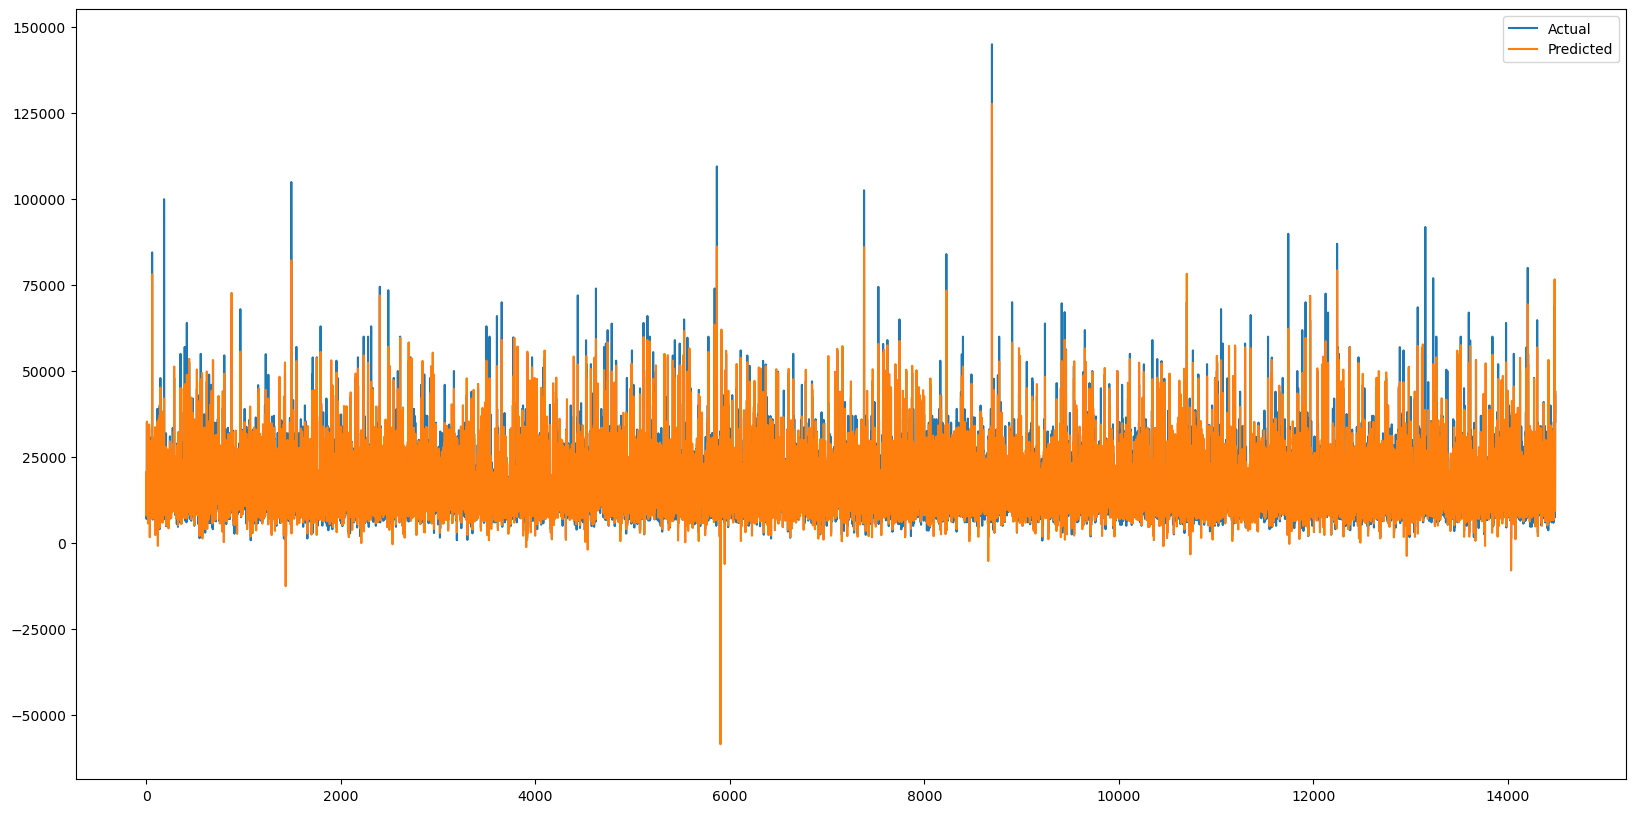



Degree 5
R2 Score: 0.73
Mean Squared Error: 23576162.97
Mean Absolute Error: 1966.97
Mean Absolute Percentage Error: 0.14


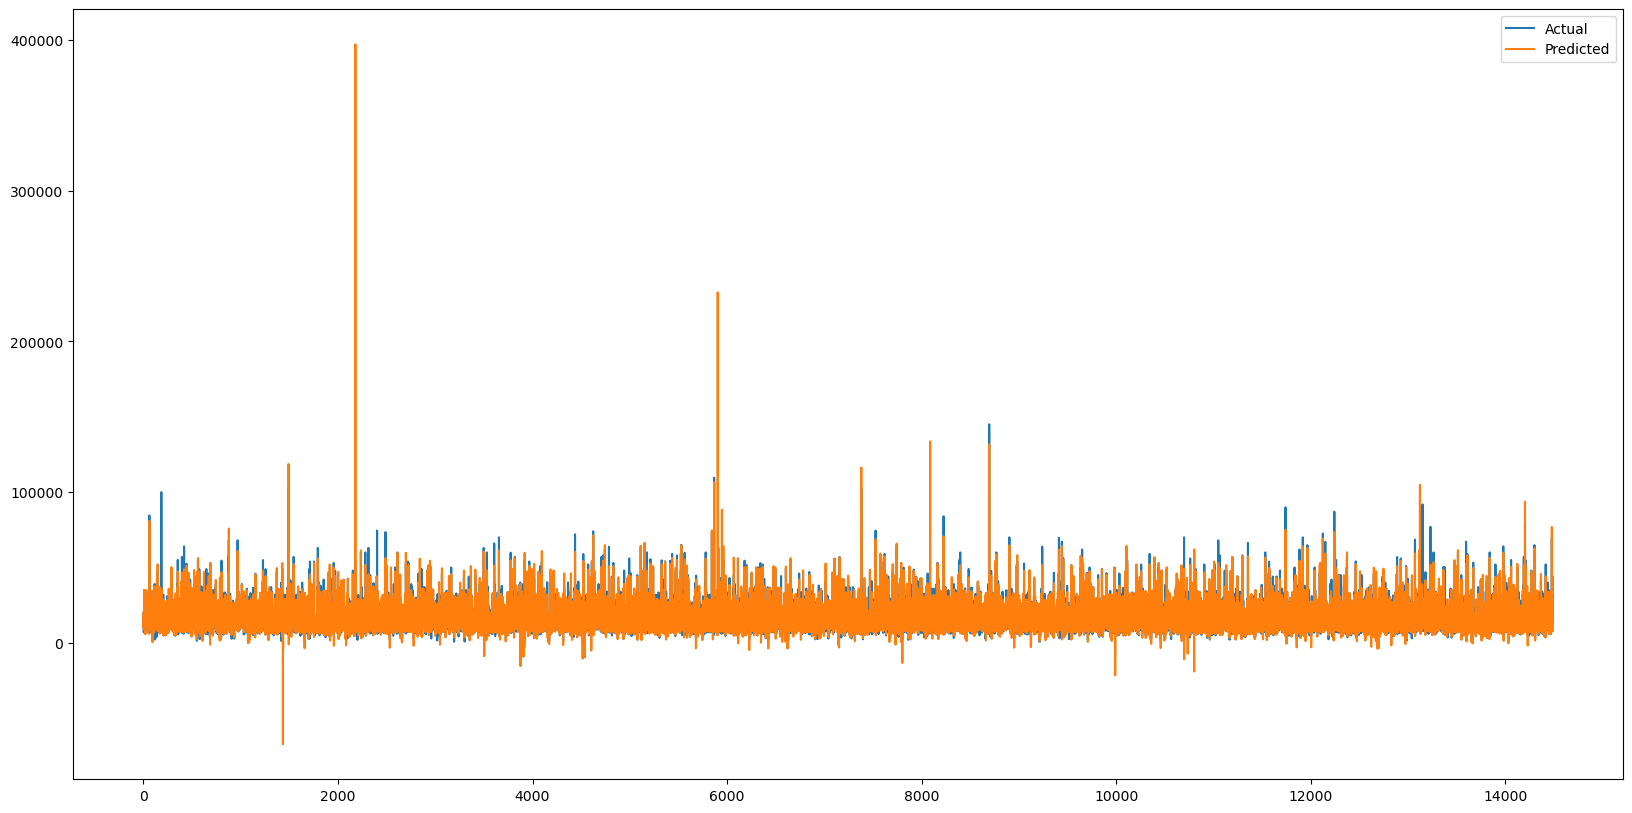



Degree 6
R2 Score: -7.1
Mean Squared Error: 716446975.07
Mean Absolute Error: 2221.1
Mean Absolute Percentage Error: 0.16


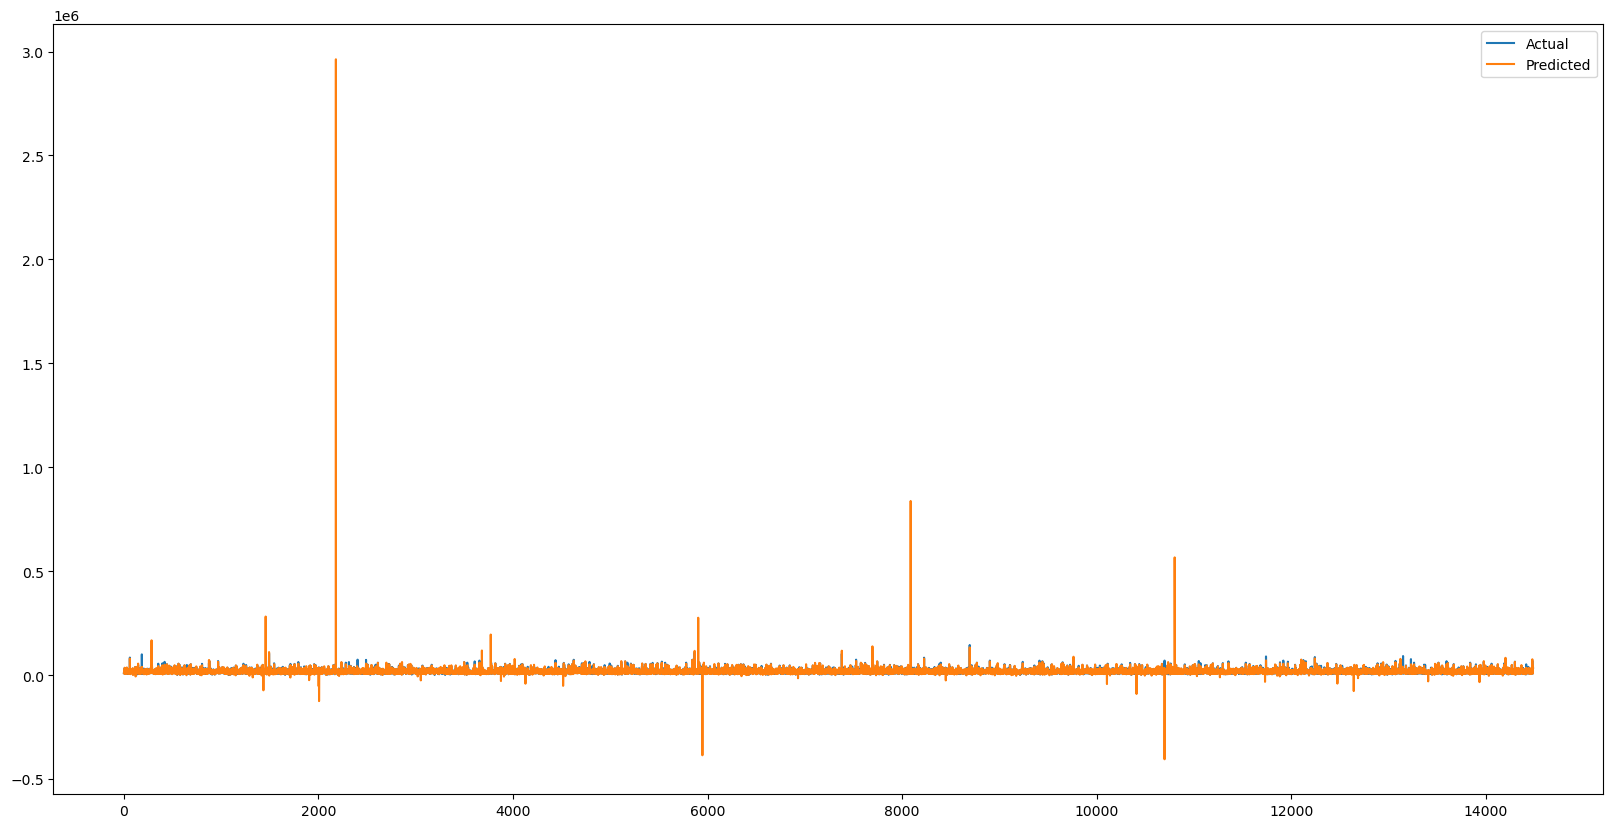



Degree 7
R2 Score: -34.15
Mean Squared Error: 3108017029.46
Mean Absolute Error: 2738.23
Mean Absolute Percentage Error: 0.18


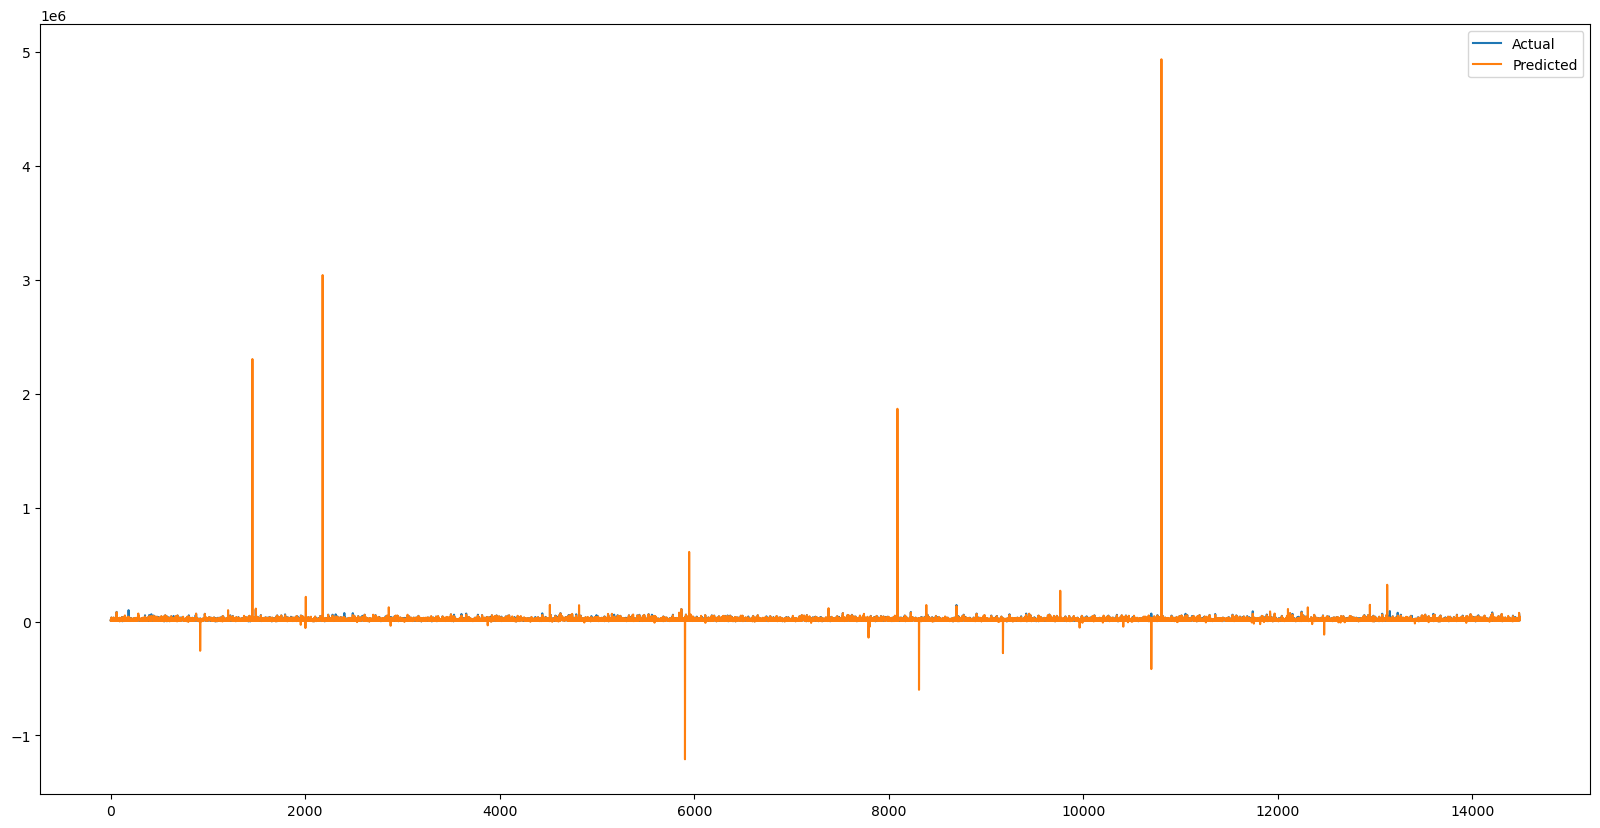

In [16]:
r2 = []
mse = []
mae = []
mape = []
for i in range(1, 8):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    Model = LinearRegression()
    Model.fit(X_train, y_train)
    y_pred = Model.predict(X_test)

    r2.append(round(r2_score(y_test, y_pred), 2))
    mse.append(round(mean_squared_error(y_test, y_pred), 2))
    mae.append(round(mean_absolute_error(y_test, y_pred), 2))
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred), 2))

    print(f'Degree {i}')
    print(f'R2 Score: {r2[-1]}')
    print(f'Mean Squared Error: {mse[-1]}')
    print(f'Mean Absolute Error: {mae[-1]}')
    print(f'Mean Absolute Percentage Error: {mape[-1]}')

    Y_Test_Pred = pd.DataFrame({"Y_Test": y_test, "Y_Pred": y_pred})
    Y_Test_Pred = Y_Test_Pred.reset_index()
    plt.figure(figsize=(20, 10))
    Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
    plt.plot(Y_Test_Pred)
    plt.legend(["Actual", "Predicted"])
    plt.show()
    print()
    print()

# Plot R2 Score, Mean Squared Error, Mean Absolute Error

## Plot without standardization

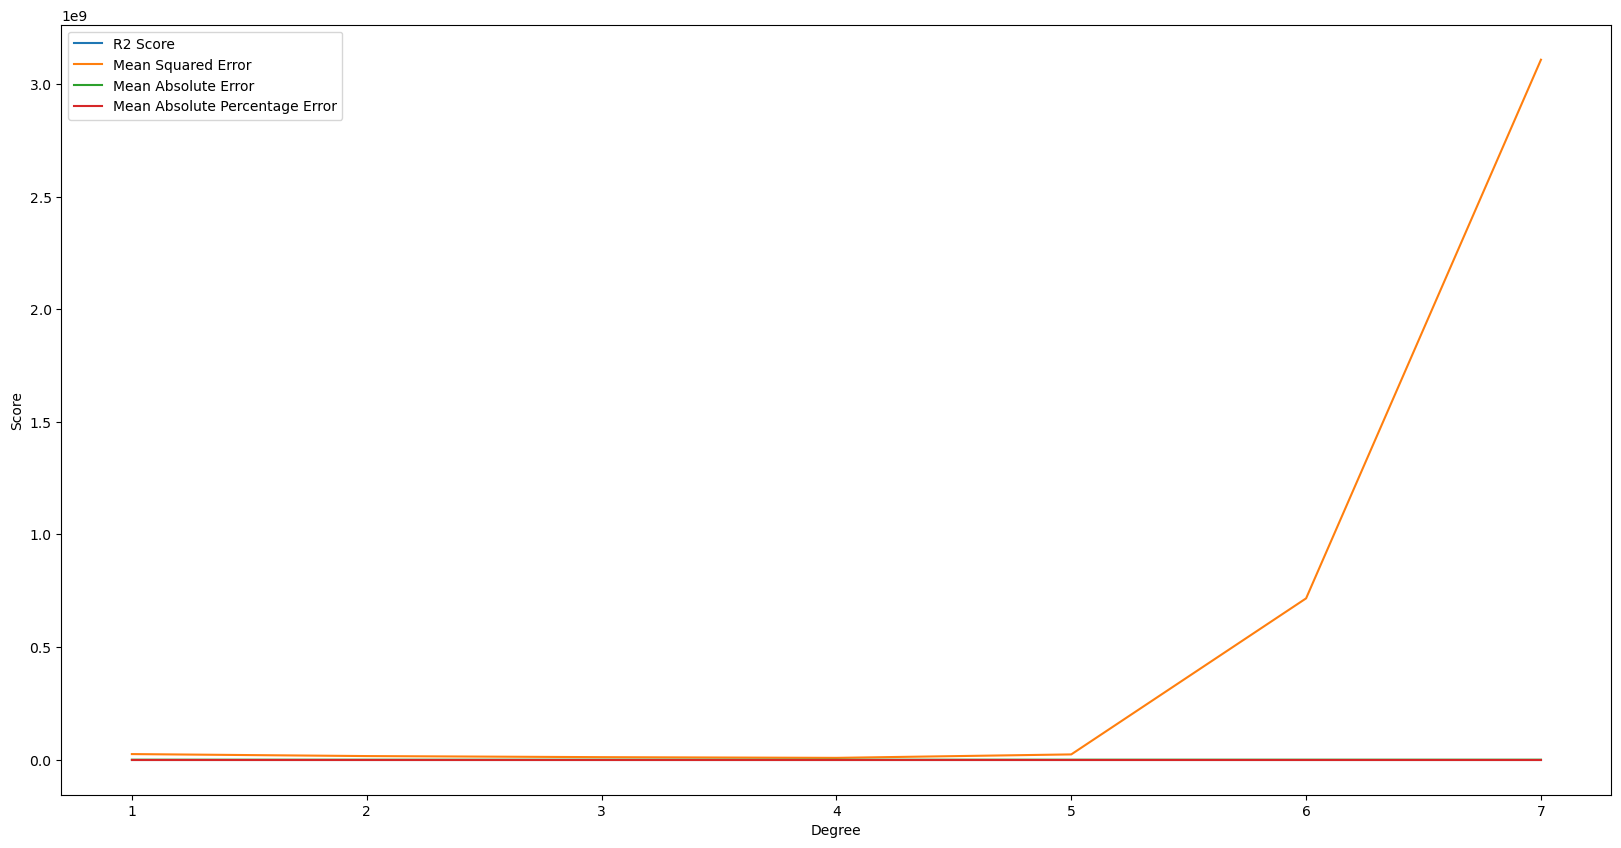

In [17]:
r2 = np.array(r2)
mse = np.array(mse)
mae = np.array(mae)
mape = np.array(mape)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.linspace(1, 7, 7), r2, label='R2 Score')
ax.plot(np.linspace(1, 7, 7), mse, label='Mean Squared Error')
ax.plot(np.linspace(1, 7, 7), mae, label='Mean Absolute Error')
ax.plot(np.linspace(1, 7, 7), mape, label='Mean Absolute Percentage Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Score')
plt.legend()
plt.show()

## Plot with standardization

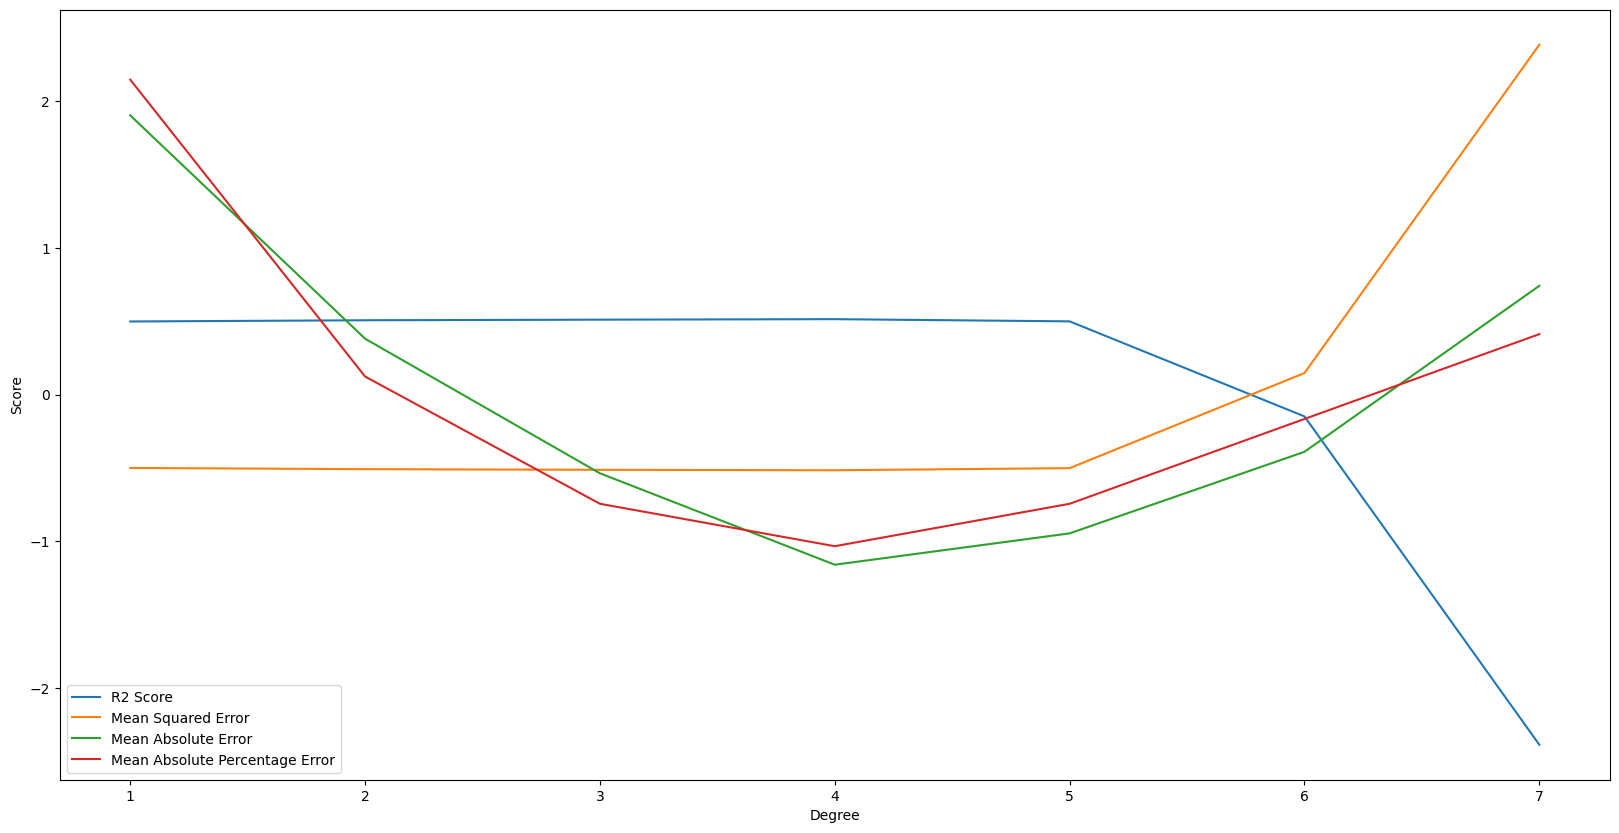

In [18]:
r2 = standardize(r2)
mse = standardize(mse)
mae = standardize(mae)
mape = standardize(mape)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.linspace(1, 7, 7), r2, label='R2 Score')
ax.plot(np.linspace(1, 7, 7), mse, label='Mean Squared Error')
ax.plot(np.linspace(1, 7, 7), mae, label='Mean Absolute Error')
ax.plot(np.linspace(1, 7, 7), mape, label='Mean Absolute Percentage Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Score')
plt.legend()
plt.show()